In [204]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from src.wmf import WeightedMatrixFactorization

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [205]:
params = pd.read_csv('params.csv')

# getting the parameters:
n_latents = params['n_latents'][0]
n_iter = params['n_iter'][0]
lambda_reg = params['lambda_reg'][0]
w_obs = params['w_obs'][0]
w_unobs = params['w_unobs'][0]

In [207]:
feedback_matrix = np.array([[3, 4, np.nan, 1, np.nan, np.nan, 5, np.nan, np.nan, np.nan],
                            [1, 3, np.nan, np.nan, np.nan, 3, np.nan, np.nan, 5, 5],
                            [1, np.nan, 1, 4, 4, np.nan, np.nan, np.nan, 3, 4]])

wmf = WeightedMatrixFactorization(
    feedback_matrix, 
    n_latents=n_latents,
    n_iter=n_iter,
    lambda_reg=lambda_reg,
    seed=50
    )

hist_loss = wmf.fit(method='WALS', verbose=False)

/Users/davidecapone/Documents/repo/IRProject/src/wmf.py:100: RuntimeWarning: divide by zero encountered in divide
  # Regularization term
/Users/davidecapone/Documents/repo/IRProject/src/wmf.py:99: RuntimeWarning: divide by zero encountered in divide
  


# Plot the loss

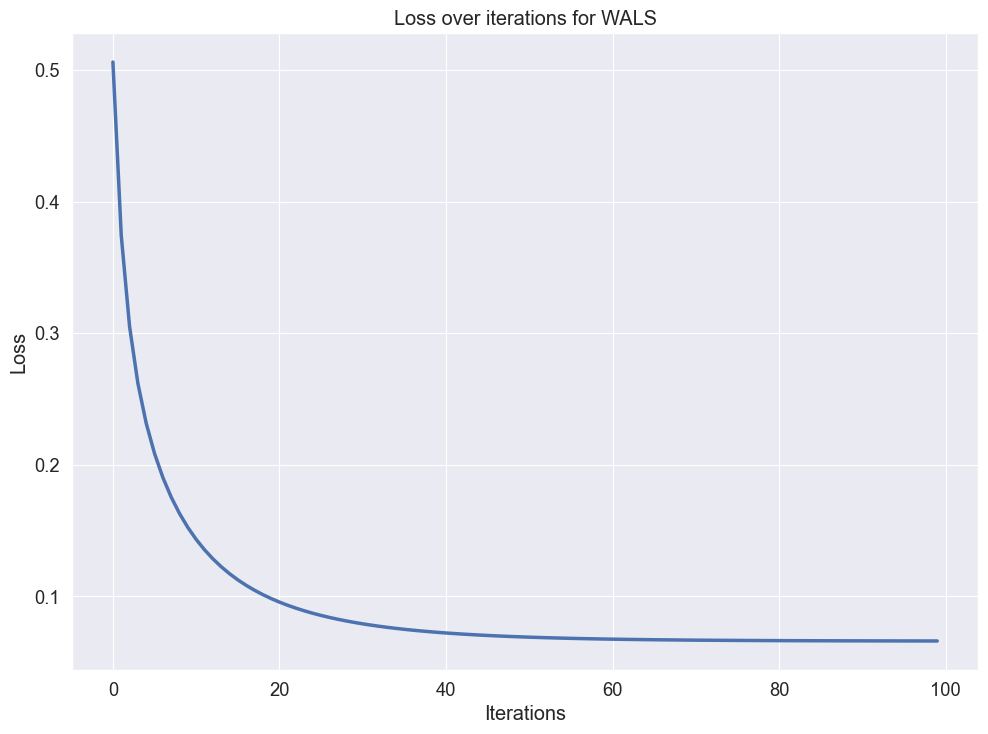

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns settings
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context('paper', font_scale=1.5, rc={"lines.linewidth": 2.5})


lists = sorted(hist_loss.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

# lineplot 
sns.lineplot(x=list(hist.keys()), y=list(hist.values()))
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss over iterations for WALS")
plt.show()